Mini-Project3
========

In [31]:
# For nicer printing
options(digits=2);

In [32]:
# Read in the data
data <- read.table(file="data.log",head=TRUE,sep=";")
colnames(data) <- c("name", "date", "scope", "numStars", "numDependents"
                    , "finalScore", "qualityScore", "popularityScore", 
                    "maintenanceScore", "health", "brand", "test", "carefulness", 
                    "numDownloads", "accelDownloads", "commInterest", "dependentsCountEval", 
                    "releasesFreq", "issuesDistrib", "opeIssues", "numCommits", "maintainers", "devDepends", 
                    "releases", "downloads", "testsSize", "readmeSize", "hasTestScript");

In [33]:
summary(data)

                             name                             date      
 communal                      :    7   2014-10-17T14:30:43.069Z:    7  
 data-sample                   :    7   2015-02-16T15:29:02.871Z:    7  
 lutris                        :    7   2015-05-14T03:47:16.965Z:    7  
 mosca-destroysoon             :    7   2015-11-09T17:16:38.968Z:    7  
 node-avalon                   :    7   2016-08-04T09:21:58.600Z:    7  
 npmtest-eslint-plugin-flowtype:    7   2016-09-23T00:02:05.284Z:    7  
 (Other)                       :23142   (Other)                 :23142  
      scope          numStars   numDependents    finalScore    qualityScore 
 unscoped:23184   Min.   :  0   Min.   :   0   Min.   :0.00   Min.   :0.00  
                  1st Qu.:  0   1st Qu.:   0   1st Qu.:0.18   1st Qu.:0.33  
                  Median :  0   Median :   0   Median :0.33   Median :0.51  
                  Mean   :  0   Mean   :   2   Mean   :0.35   Mean   :0.53  
                  3rd Qu.:  0  

### Interpret  basic summaries

In [34]:
cor(data[,-c(1:4,28)],method="spearman",use="pairwise.complete.obs" ); #OK for any: uses ranks

,numDependents,finalScore,qualityScore,popularityScore,maintenanceScore,health,brand,test,carefulness,numDownloads,...,releasesFreq,issuesDistrib,opeIssues,numCommits,maintainers,devDepends,releases,downloads,testsSize,readmeSize
numDependents,1.000,0.27,0.24,0.6123,0.20,0.0672,0.185,0.242,0.18,0.417,...,0.15,0.155,0.2308,0.20,0.176,0.139,0.087,0.4278,0.216,0.15
finalScore,0.268,1.00,0.84,0.6455,0.94,0.3777,0.528,0.679,0.69,0.389,...,0.64,0.819,0.8124,0.83,0.154,0.404,0.342,0.3213,0.536,0.52
qualityScore,0.245,0.84,1.00,0.5264,0.63,0.4408,0.630,0.848,0.74,0.326,...,0.41,0.568,0.6081,0.60,0.128,0.476,0.224,0.3063,0.745,0.56
popularityScore,0.612,0.65,0.53,1.0000,0.58,0.1444,0.346,0.456,0.44,0.666,...,0.29,0.521,0.6715,0.50,0.253,0.302,0.217,0.6619,0.363,0.43
maintenanceScore,0.196,0.94,0.63,0.5776,1.00,0.2653,0.397,0.499,0.57,0.339,...,0.70,0.876,0.8250,0.84,0.135,0.315,0.356,0.2589,0.352,0.41
health,0.067,0.38,0.44,0.1444,0.27,1.0000,0.122,0.140,0.25,0.055,...,0.18,0.225,0.2035,0.23,-0.025,-0.025,0.121,-0.0019,-0.101,-0.08
brand,0.185,0.53,0.63,0.3462,0.40,0.1218,1.000,0.563,0.39,0.215,...,0.27,0.352,0.3968,0.41,0.118,0.378,0.130,0.2162,0.421,0.45
test,0.242,0.68,0.85,0.4563,0.50,0.1397,0.563,1.000,0.41,0.265,...,0.28,0.471,0.5228,0.47,0.128,0.526,0.087,0.2826,0.876,0.40
carefulness,0.175,0.69,0.74,0.4401,0.57,0.2461,0.389,0.406,1.00,0.339,...,0.46,0.484,0.5054,0.57,0.121,0.337,0.323,0.2979,0.257,0.58
numDownloads,0.417,0.39,0.33,0.6664,0.34,0.0547,0.215,0.265,0.34,1.000,...,0.38,0.230,0.3304,0.33,0.245,0.258,0.462,0.9158,0.228,0.34


Interpret correlations

Now, just show top correlations

In [35]:
# Define a function
hiCor <- function(x, level){
  res <- cor(x,method="spearman",use="pairwise.complete.obs");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max) > level;
  res[sel,sel];
}
hiCor(data[,-c(1:3,17,28)],.7);# 17 is the same as 5

,finalScore,qualityScore,popularityScore,maintenanceScore,test,carefulness,numDownloads,commInterest,releasesFreq,issuesDistrib,opeIssues,numCommits,downloads,testsSize
finalScore,1.00,0.84,0.65,0.94,0.68,0.69,0.39,0.67,0.64,0.82,0.81,0.83,0.32,0.54
qualityScore,0.84,1.00,0.53,0.63,0.85,0.74,0.33,0.54,0.41,0.57,0.61,0.60,0.31,0.74
popularityScore,0.65,0.53,1.00,0.58,0.46,0.44,0.67,0.85,0.29,0.52,0.67,0.50,0.66,0.36
maintenanceScore,0.94,0.63,0.58,1.00,0.50,0.57,0.34,0.62,0.70,0.88,0.82,0.84,0.26,0.35
test,0.68,0.85,0.46,0.50,1.00,0.41,0.27,0.47,0.28,0.47,0.52,0.47,0.28,0.88
carefulness,0.69,0.74,0.44,0.57,0.41,1.00,0.34,0.43,0.46,0.48,0.51,0.57,0.30,0.26
numDownloads,0.39,0.33,0.67,0.34,0.27,0.34,1.00,0.41,0.38,0.23,0.33,0.33,0.92,0.23
commInterest,0.67,0.54,0.85,0.62,0.47,0.43,0.41,1.00,0.20,0.60,0.77,0.53,0.44,0.36
releasesFreq,0.64,0.41,0.29,0.70,0.28,0.46,0.38,0.20,1.00,0.39,0.34,0.73,0.20,0.22
issuesDistrib,0.82,0.57,0.52,0.88,0.47,0.48,0.23,0.60,0.39,1.00,0.86,0.67,0.22,0.31


## So much correlation is typical in Data Science
* How to select an orthogonal subset of predictors?

Lets take a look at principal components

In [36]:
sumr = summary(data[,-c(1:3,17,28)]);
dataOrig = data [,-c(1:3,17,28)]
dataTr = data [,-c(1:3,17,28)]
for (i in 1:dim(sumr)[2]){
    md = as.double(sub('Median :', '', sumr[3,i]));
    mn = as.double(sub('Mean   :', '', sumr[4,i]));
    mx = as.double(sub('Max.   :', '', sumr[6,i]));    
    if (mn/md>2||mx>10*mn){
        print (paste(c("transforming",i, md, mn, mx),collapse=" "));
        dataTr[,i] = log(dataTr[,i]-min(dataTr[,i],na.rm=T)+.1)
    }
}

[1] "transforming 1 0 0 425"
[1] "transforming 2 0 2 3007"
[1] "transforming 5 0.02 0.04 0.73"
[1] "transforming 8 0 0.09 1"
[1] "transforming 9 0 0.29 1"
[1] "transforming 11 30 22147 28133457"
[1] "transforming 12 0 83 99102"
[1] "transforming 13 2 92 70069"
[1] "transforming 14 0.18 0.38 1"
[1] "transforming 17 0 0.25 1"
[1] "transforming 18 1 1 174"
[1] "transforming 19 2 5 107"
[1] "transforming 20 3 6 426"
[1] "transforming 21 396 210000 3.14e+08"
[1] "transforming 22 216 199000 1.28e+09"
[1] "transforming 23 1010 2163 148984"


    finalScore
PC1       0.32
    numStars numDependents popularityScore numDownloads downloads
PC2    -0.32         -0.36           -0.37         -0.4     -0.42
    test releasesFreq releases testsSize
PC3 0.44        -0.33    -0.34      0.45
    commInterest issuesDistrib opeIssues releases
PC4         0.35          0.39      0.43     -0.4
    health readmeSize
PC5  -0.65       0.39


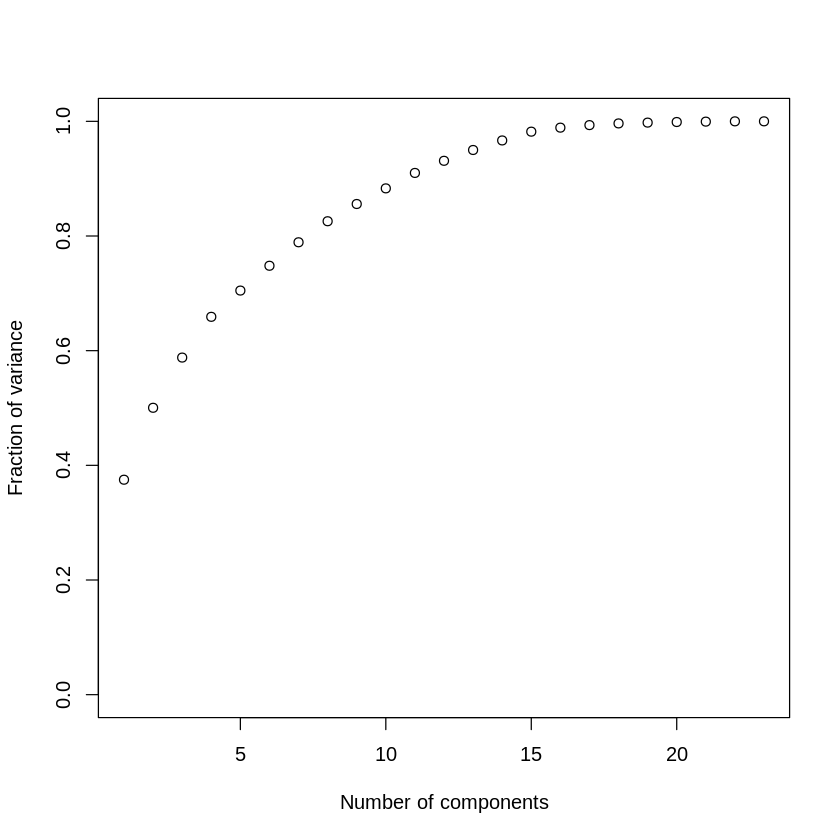

In [37]:
dataTr1 = na.omit(dataTr)
plot(1:dim(dataTr1)[2],cumsum(prcomp(dataTr1, retx=F,scale=T)$sdev^2)/sum(prcomp(dataTr1, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of components",ylab="Fraction of variance");
res<-prcomp(dataTr1, retx=F,scale=T)$rotation[,1:5];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
for (i in 1:5)
  print(t(res[resAbs[,i]>.3,i,drop=FALSE]));

* Regress each predictor on the remaining predictors
eliminate with the highest adjR^2

In [38]:
res <- c();
vnam <- names(dataTr1);
for (i in 2:dim(dataTr1)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data))$r.squared,2)));
}
row.names(res) <- vnam[res[,1]];
res[order(-res[,2]),];

finalScore,3,1.00
qualityScore,4,1.00
popularityScore,5,1.00
maintenanceScore,6,1.00
numDownloads,11,1.00
downloads,21,1.00
accelDownloads,12,0.99
test,9,0.91
releasesFreq,14,0.88
issuesDistrib,15,0.88
opeIssues,16,0.84


### Finally select the model
  Note, that exploring only the predictor space is not leading to
     multiple comparisons issue!
# V14 is downloads

  * V6, V14, V26, V20, V27 from PCA (exclude V25, since its another measure of downloads)
  *          V26, V22, V23, V16 from the regression

In [39]:
fmla ~ downloads ~ finalScore + numDownloads + devDepends + releases + 
testsSize + maintainers + readmeSize + commInterest + numCommits


fmla ~ downloads ~ finalScore + numDownloads + devDepends + releases + 
    testsSize + maintainers + readmeSize + commInterest + numCommits

* We'll need to do prediction, so create training/test sets

In [40]:
data1 <- dataTr1;
trainIdx = rep (0,dim(dataTr1)[1]);
trainIdx [sample(1:dim(dataTr1)[1], dim(dataTr1)[1]*.99)] = 1;

In [41]:
# are they different?
tapply(dataTr1$downloads, trainIdx, mean)

0   1 
6.5 6.5

In [42]:
mod <- lm (downloads ~ finalScore + numDownloads + devDepends + releases + 
testsSize + maintainers + readmeSize + commInterest + numCommits, data=dataTr1[trainIdx==1,]);
summary(mod); 


Call:
lm(formula = downloads ~ finalScore + numDownloads + devDepends + 
    releases + testsSize + maintainers + readmeSize + commInterest + 
    numCommits, data = dataTr1[trainIdx == 1, ])

Residuals:
   Min     1Q Median     3Q    Max 
-3.193 -0.168  0.071  0.245  6.409 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.988472   0.026282  113.71  < 2e-16 ***
finalScore   -0.805860   0.045231  -17.82  < 2e-16 ***
numDownloads  0.923898   0.002055  449.56  < 2e-16 ***
devDepends   -0.003197   0.002014   -1.59     0.11    
releases     -0.042762   0.002031  -21.06  < 2e-16 ***
testsSize     0.016267   0.000803   20.25  < 2e-16 ***
maintainers   0.034586   0.004130    8.37  < 2e-16 ***
readmeSize    0.009159   0.001016    9.02  < 2e-16 ***
commInterest  0.054198   0.001985   27.30  < 2e-16 ***
numCommits   -0.037362   0.006325   -5.91  3.5e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.47 on 20

Fit is is so so: .28

Some variables appear to be irrelevant:

V23, V27

### Good to order by variance explained (Anova Deviance/Df)

In [43]:
anova(mod, test="Chi");

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
finalScore,1,8332.0,8.3e+03,38535,0.0e+00
numDownloads,1,55360.6,5.5e+04,256038,0.0e+00
devDepends,1,19.9,2.0e+01,92,1.0e-21
releases,1,270.2,2.7e+02,1250,1.3e-265
testsSize,1,102.4,1.0e+02,473,8.9e-104
maintainers,1,34.3,3.4e+01,158,3.4e-36
readmeSize,1,48.2,4.8e+01,223,3.6e-50
commInterest,1,165.3,1.7e+02,765,3.3e-165
numCommits,1,7.5,7.5e+00,35,3.5e-09
Residuals,20037,4332.4,2.2e-01,NA,NA


A similar picture, V23 not needed, but here V26 is also irrelevant, but V27 appears to be relevant

In [44]:
#discretize for other types of predictions
breaks <- quantile(dataTr1[trainIdx==1,"downloads"], seq(0, 1, 0.25));
print(breaks);
dataTr1$downloadsD <- cut(dataTr1$downloads, breaks = breaks);

#now separate trining/test sets
dataTr2 = dataTr1[trainIdx==1,];
dataTst2 = dataTr1[trainIdx==0,];
row.names(dataTr2) = 1:dim(dataTr2)[1];
mod <- lm(downloads ~ finalScore + numDownloads + releases + testsSize + maintainers + readmeSize + commInterest , data=dataTr2);
summary(mod); 


  0%  25%  50%  75% 100% 
-2.3  5.2  6.1  7.1 19.6 



Call:
lm(formula = downloads ~ finalScore + numDownloads + releases + 
    testsSize + maintainers + readmeSize + commInterest, data = dataTr2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.165 -0.169  0.073  0.245  6.431 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.119966   0.015045  207.37   <2e-16 ***
finalScore   -1.014724   0.029175  -34.78   <2e-16 ***
numDownloads  0.923984   0.002056  449.40   <2e-16 ***
releases     -0.044326   0.002014  -22.01   <2e-16 ***
testsSize     0.016653   0.000724   23.01   <2e-16 ***
maintainers   0.034343   0.004134    8.31   <2e-16 ***
readmeSize    0.009810   0.000993    9.88   <2e-16 ***
commInterest  0.054849   0.001984   27.64   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.47 on 20039 degrees of freedom
Multiple R-squared:  0.937,	Adjusted R-squared:  0.937 
F-statistic: 4.24e+04 on 7 and 20039 DF,  p-value: <2e-16


### R2 almost the same
   * don't chase the best fit, as it leads to overfitting

In [45]:
anova(mod, test="F");#it is good to order predictors by deviance explained

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
finalScore,1,8332,8.3e+03,38466,0.0e+00
numDownloads,1,55361,5.5e+04,255582,0.0e+00
releases,1,269,2.7e+02,1241,6.6e-264
testsSize,1,124,1.2e+02,570,2.5e-124
maintainers,1,34,3.4e+01,158,3.9e-36
readmeSize,1,47,4.7e+01,219,2.6e-49
commInterest,1,166,1.7e+02,764,4.4e-165
Residuals,20039,4341,2.2e-01,NA,NA


* Note: use test="Chi" for generalized linear models (glm)
* Note: R's anova order matters in variance explained, as
  each SS is based on the residuals from predictors going before it
* Alternative sum of squares for ANOVA are obtained via drop1
*  In this case it is based on the residuals of remaining predictors (not
  just of preceeding predictors

In [46]:
drop1(mod, test="F");

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,4341,-30657,NA,NA
finalScore,1,262,4603,-29484,1210,2.1e-257
numDownloads,1,43745,48086,17553,201958,0.0e+00
releases,1,105,4446,-30181,484,4.2e-106
testsSize,1,115,4455,-30136,530,1.1e-115
maintainers,1,15,4356,-30590,69,1.0e-16
readmeSize,1,21,4362,-30562,98,5.7e-23
commInterest,1,166,4506,-29909,764,4.4e-165


### Variance inflation factor
 http://en.wikipedia.org/wiki/Variance_inflation_factor

In [47]:
library(car)
vif(mod);

finalScore numDownloads     releases    testsSize  maintainers   readmeSize 
         2.5          1.5          1.3          1.5          1.1          1.5 
commInterest 
         1.9

￼
* Is less than 5 (max is 3.5 for V20)

### Exercise: other diagnostics
* is model stable if some data is dropped?
* is there a time trend 
* independece (residuals)


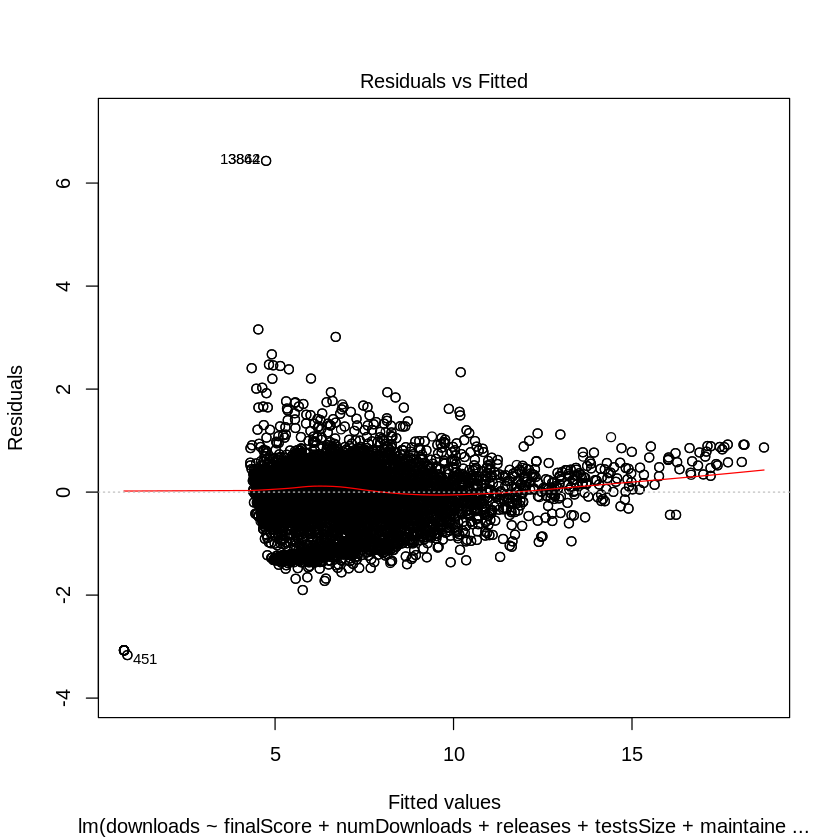

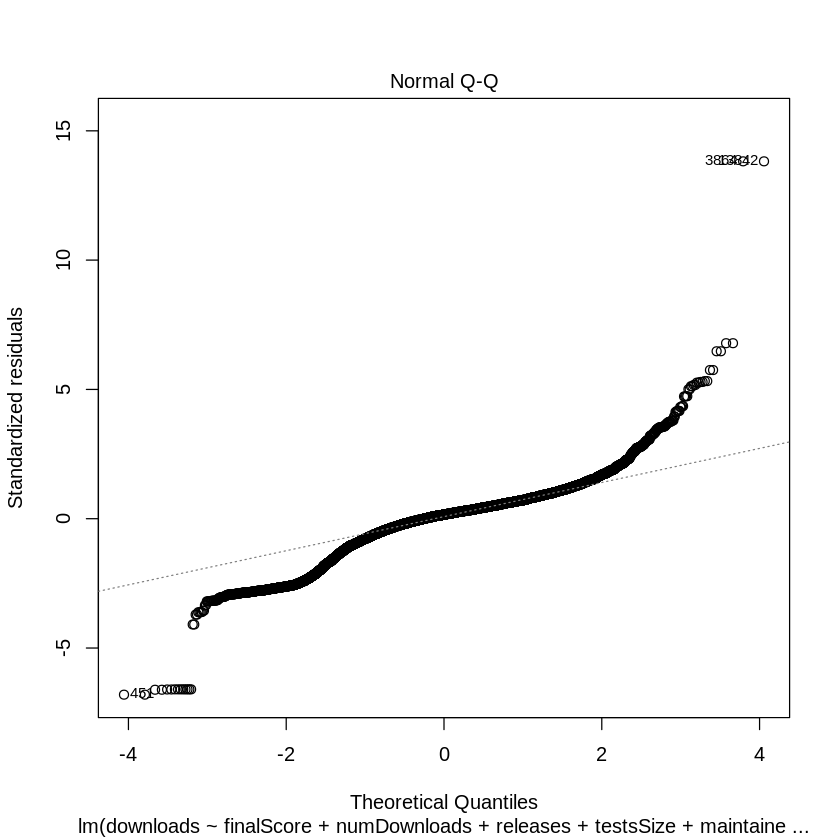

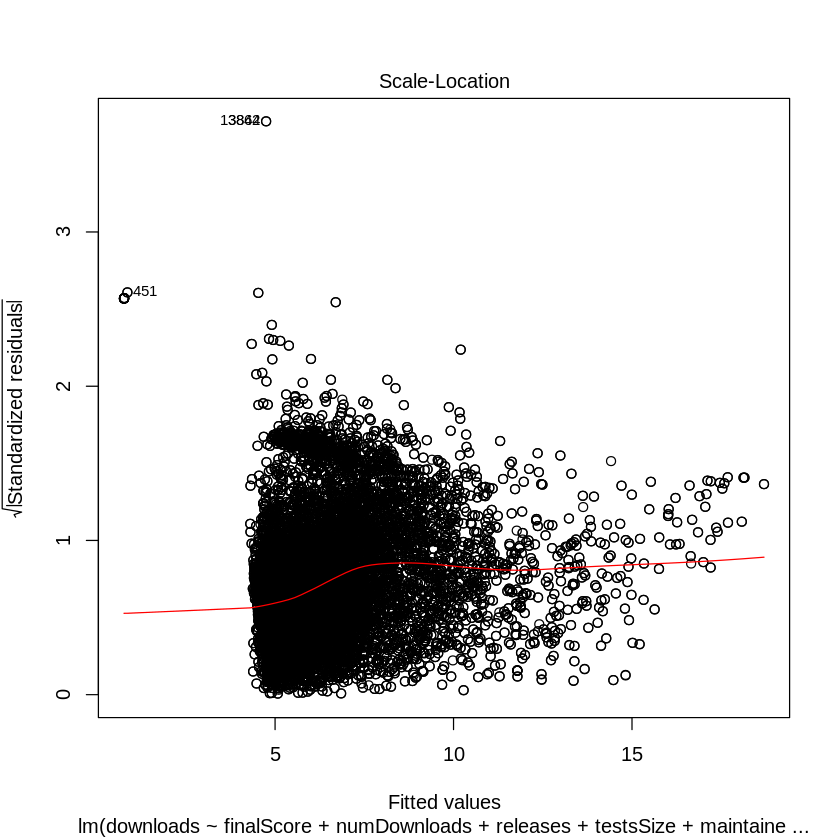

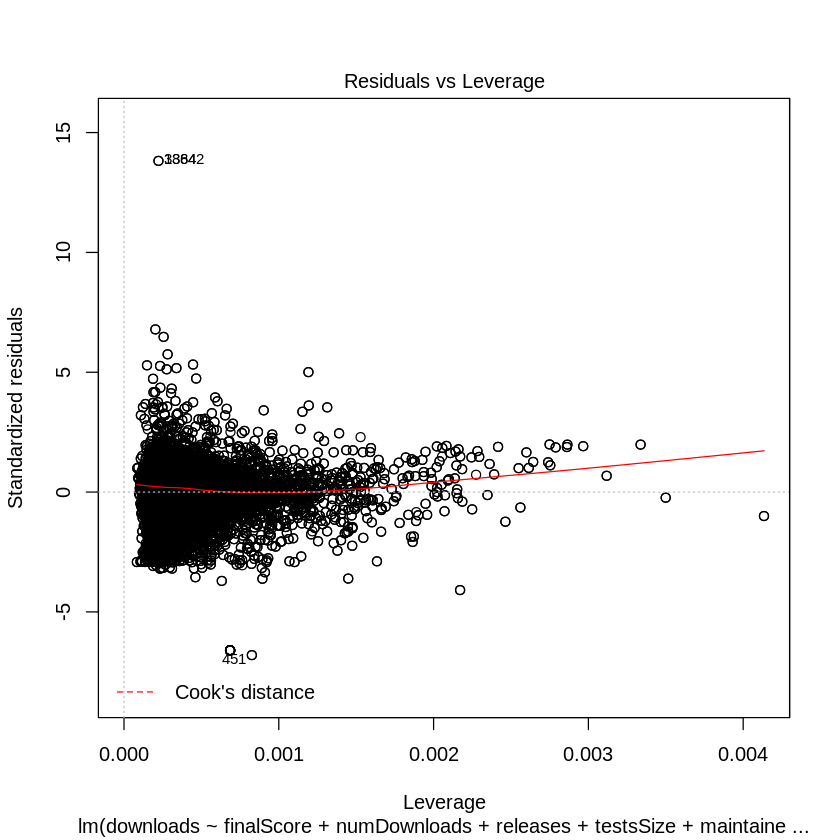

In [48]:
plot(mod)

[1]  4485  7775  7071  8437 10761   530
[1] 20041    24



Call:
lm(formula = downloads ~ finalScore + numDownloads + releases + 
    testsSize + maintainers + readmeSize + commInterest, data = dt1)

Residuals:
   Min     1Q Median     3Q    Max 
-3.165 -0.169  0.073  0.245  6.431 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.119694   0.015046  207.34   <2e-16 ***
finalScore   -1.014767   0.029181  -34.78   <2e-16 ***
numDownloads  0.924026   0.002056  449.37   <2e-16 ***
releases     -0.044311   0.002014  -22.00   <2e-16 ***
testsSize     0.016672   0.000724   23.04   <2e-16 ***
maintainers   0.034301   0.004134    8.30   <2e-16 ***
readmeSize    0.009811   0.000993    9.88   <2e-16 ***
commInterest  0.054826   0.001984   27.63   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.47 on 20033 degrees of freedom
Multiple R-squared:  0.937,	Adjusted R-squared:  0.937 
F-statistic: 4.24e+04 on 7 and 20033 DF,  p-value: <2e-16


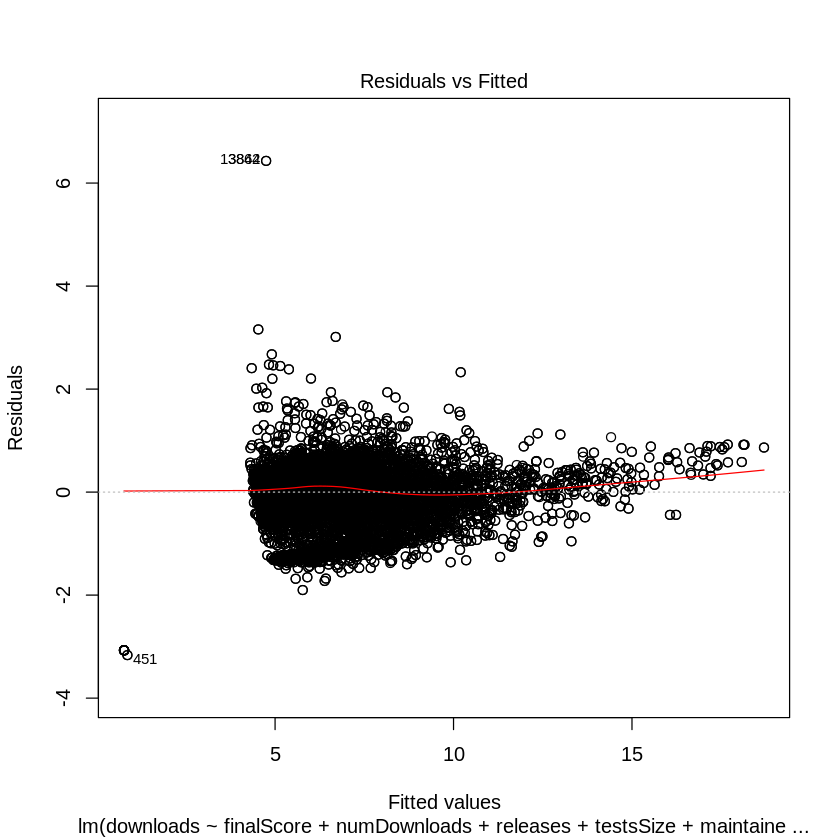

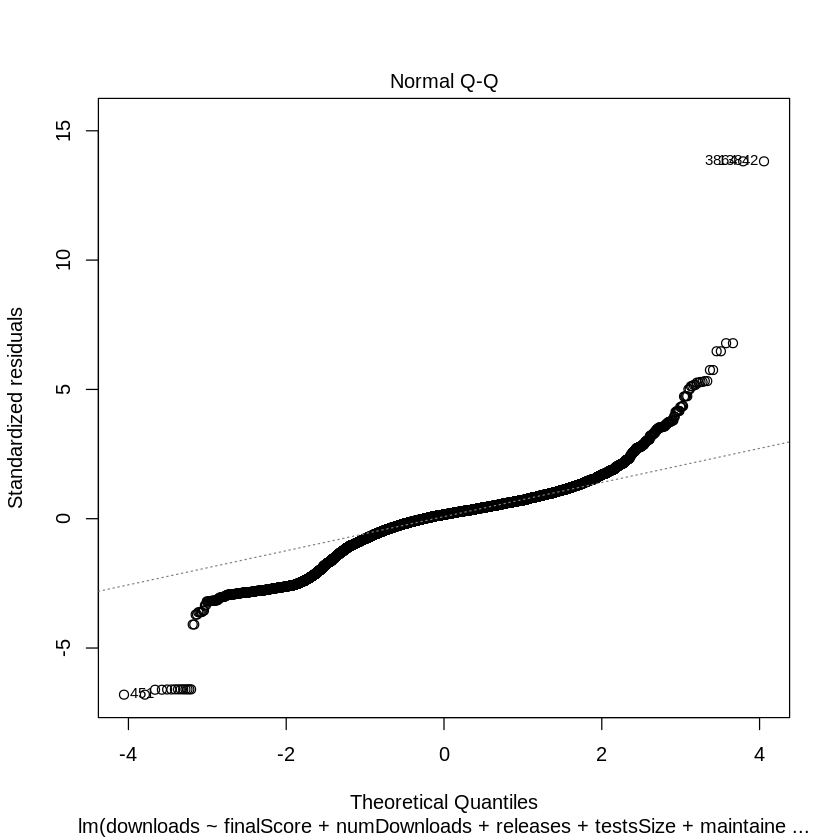

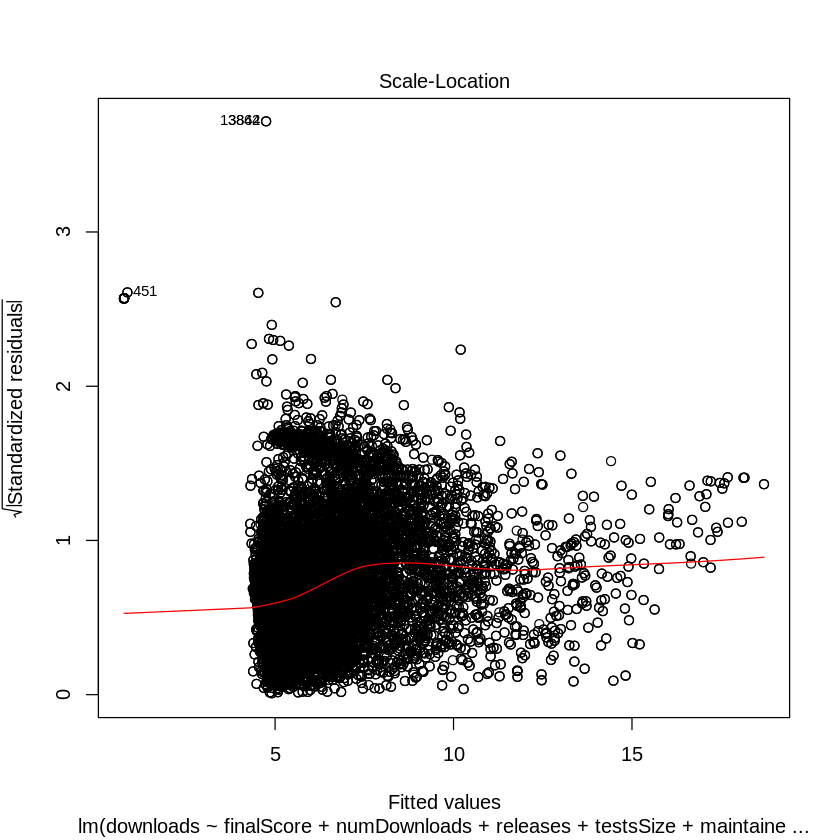

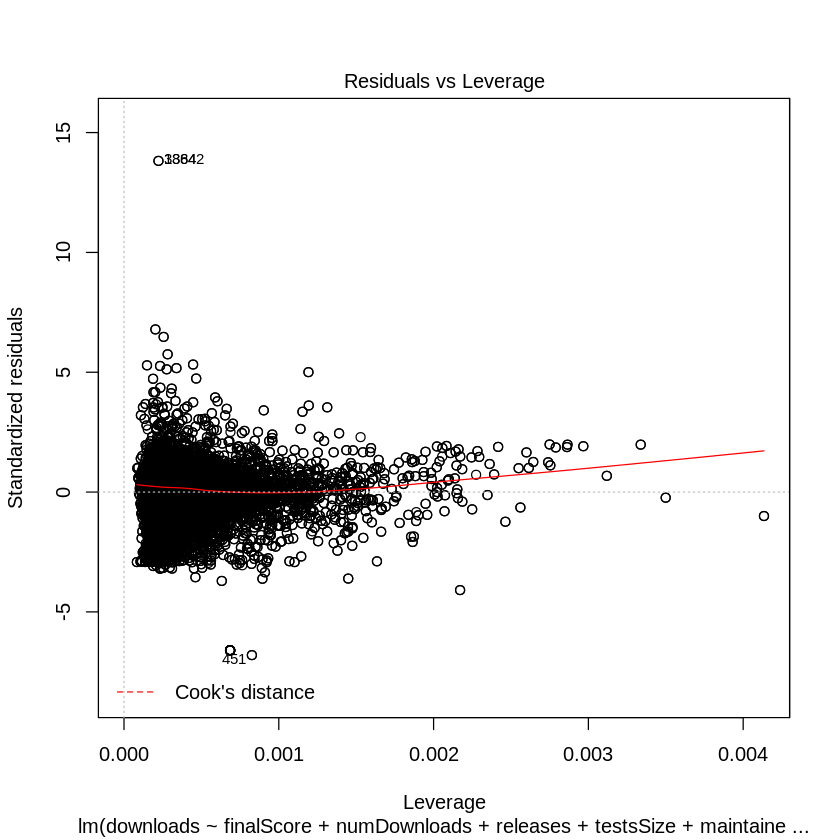

In [49]:
#Some values are extreme: 
bad=c(4485, 7775, 7071, 8437, 10761, 530);
print(bad)
dt1 = dataTr2[-bad,]
print(dim(dt1))
mod <- lm(downloads ~ finalScore + numDownloads + releases + testsSize + maintainers + readmeSize + commInterest , data=dt1);
summary(mod);
plot(mod);

In [50]:
#still a few outliers
summary(dataTr2[, c("downloads", "finalScore", "numDownloads", "releases", "testsSize", "maintainers", "readmeSize", "commInterest")])

   downloads      finalScore    numDownloads     releases      testsSize   
 Min.   :-2.3   Min.   :0.00   Min.   :-2.3   Min.   :-2.3   Min.   :-2.3  
 1st Qu.: 5.2   1st Qu.:0.24   1st Qu.: 2.7   1st Qu.:-2.3   1st Qu.:-2.3  
 Median : 6.1   Median :0.37   Median : 3.5   Median : 1.4   Median : 5.4  
 Mean   : 6.5   Mean   :0.38   Mean   : 4.0   Mean   : 0.7   Mean   : 3.3  
 3rd Qu.: 7.1   3rd Qu.:0.56   3rd Qu.: 4.6   3rd Qu.: 2.0   3rd Qu.: 8.5  
 Max.   :19.6   Max.   :0.88   Max.   :17.2   Max.   : 6.1   Max.   :21.0  
  maintainers     readmeSize    commInterest 
 Min.   :-2.3   Min.   :-2.3   Min.   :-2.3  
 1st Qu.:-2.3   1st Qu.: 4.2   1st Qu.: 0.1  
 Median :-2.3   Median : 6.9   Median : 1.1  
 Mean   :-2.1   Mean   : 5.2   Mean   : 0.9  
 3rd Qu.:-2.3   3rd Qu.: 7.9   3rd Qu.: 2.2  
 Max.   : 5.2   Max.   :11.9   Max.   :11.2  

Now interpret the model
* What do estimated coefficients mean?
    - What is effect of V6
    - What is effect of V20?
    - What is effect of V22?
    - What is effect of V16?
    - What is effect of V10?


In [51]:
#try interpret V6 in a simple way
try <- dt1[1:2,];
for (i in 1:(dim(dt1)[2]-1)){
  #print (i)
  try[,i] <- median(dt1[,i]);
}
try[1,"finalScore"] <- .36;
try[2,"finalScore"] <- .55;
adjust = min(dataOrig$finalScore)-.01;
print (exp(try[,"finalScore"])+adjust)
res <- predict(mod,try);
adjust = min(dataOrig$commInterest)-.01;
res = exp(res)+adjust
round(c(res, res[2]/res[1]),2)

[1] 1.4 1.7


1      2      2 
430.74 355.21   0.82

### How much does the dowload count decrease if finalScore goes from median of .36 to 3rd quartile (.55)?
### Answer: from 429.91 to 355 or 0.83 times 

# Do prediction

In [52]:
lm.pred <- predict(mod,dataTst2);
#mean square error
mean ((dataTst2$downloads-lm.pred)^2)
#vs prediction as mean
mean ((dataTst2$downloads-mean(dataTst2$downloads))^2)
#some improvement ....

[1] 0.22

[1] 4.1

### Try other prediction methods

In [63]:
library(rpart);

fmla <- downloads ~ finalScore + numDownloads + releases + testsSize + maintainers + readmeSize + commInterest;
cart.fit <- rpart(fmla,data=dataTr2,method="class");
cart.pred <- predict(cart.fit,newdata=dataTst2,type="class");
res <- table(cart.pred, dataTst2$downloads);
res 

                   
cart.pred           3.8308129500026 4.02713581252865 4.22097721315547
  -2.30258509299405               0                0                0
  3.55820113047182                0                0                0
  3.61361696961339                0                0                0
  3.64021428213266                0                0                0
  3.66612246699132                0                0                0
  3.69137633431252                0                0                0
  3.71600812150219                0                0                0
  3.7635229971097                 0                0                0
  3.7864597824528                 0                0                0
  3.80888224650863                0                0                0
  3.8308129500026                 0                0                0
  3.85227300102237                0                0                0
  3.87328217711172                0                0                0


In [54]:
#Quite bad

In [55]:
library(randomForest)
table(dataTr2$downloadsD)


(-2.3,5.24] (5.24,6.06] (6.06,7.12] (7.12,19.6] 
       5038        4977        5006        5012 

In [56]:
rf.fit <- randomForest(downloads ~ finalScore + numDownloads + releases + testsSize + maintainers + readmeSize + commInterest, 
                       data=dataTr2, 
                       importance=TRUE, 
                      ntree=2000);

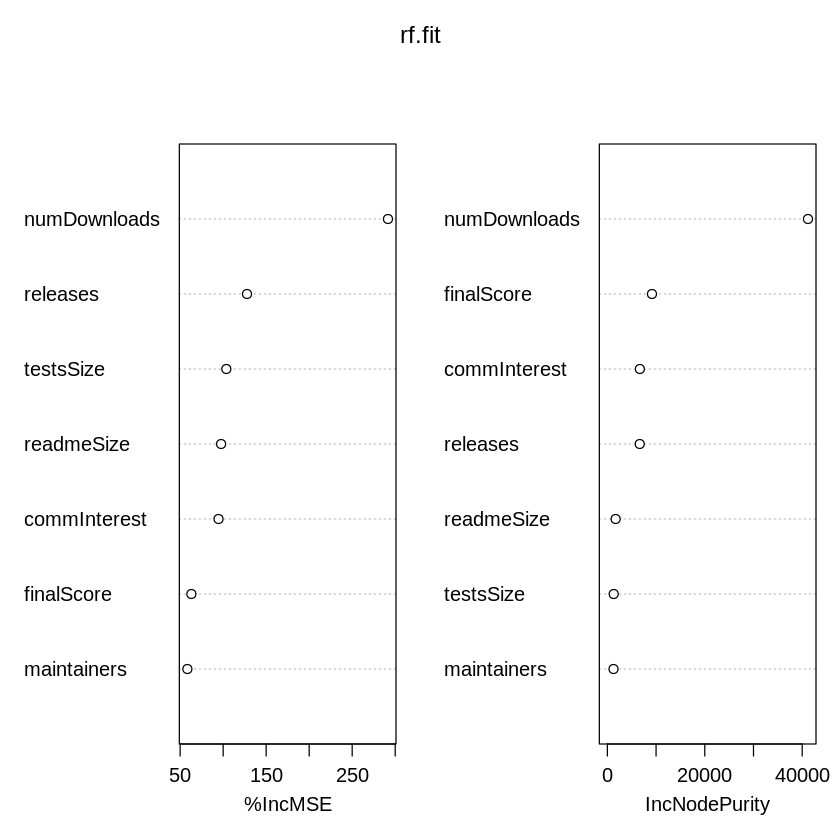

In [57]:
varImpPlot(rf.fit)

In [58]:
rf.pred <- predict(rf.fit, dataTst2)
mean ((dataTst2$downloads-rf.pred)^2)
#vs prediction as mean
mean ((dataTst2$downloads-lm.pred)^2)
# a bit of improvement over regression

[1] 0.039

[1] 0.22

In [61]:
fmla=as.formula(paste("downloads~",paste(names(dataTr2)[-c(11,21,24)], collapse="+")))
fmla

downloads ~ numStars + numDependents + finalScore + qualityScore + 
    popularityScore + maintenanceScore + health + brand + test + 
    carefulness + accelDownloads + commInterest + releasesFreq + 
    issuesDistrib + opeIssues + numCommits + maintainers + devDepends + 
    releases + testsSize + readmeSize

In [60]:
rf.fit1 <- randomForest(fmla, 
                       data=dataTr2, 
                       importance=TRUE, 
                      ntree=2000);

ERROR: Error in eval(predvars, data, env): object 'Downloads' not found


In [ ]:
rf.pred1 <- predict(rf.fit1, dataTst2)
varImpPlot(rf.fit1)
mean ((dataTst2$downloads-rf.pred1)^2)

This is even better: V24 improves MSE the most, 
while V15 improves node purity the most

In [ ]:
rr = range(c(rf.pred1-dataTst2$downloads,rf.pred-dataTst2$downloads,
             lm.pred-dataTst2$downloads));
plot(dataTst2$downloads, rf.pred1-dataTst2$downloads, pch="*",ylim=rr);
points(dataTst2$downloads, rf.pred-dataTst2$downloads, pch="+")
points(dataTst2$downloads, lm.pred-dataTst2$downloads, pch="-")

Seems like there may be some trend remaining here